In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import os
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

## Create a dataframe from each csv file

In [3]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


## Inspect the data in the (2) dataframes

In [5]:
# Get the columns and the rows that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
# Get the columns and the rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
# Get the columns and the rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [10]:
# Get the columns and the rows that are not null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [11]:
# Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

# Part 1: Create a PyBer Summary Dataframe

## Merge the (2) dataframes into (1) dataframe.

In [12]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Create dataframes for each city type.

In [13]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [14]:
# Determine if there are any missing values in the urban cities data.
urban_cities_df.notnull()

,city,date,fare,ride_id,driver_count,type
0,True,True,True,True,True,True
1,True,True,True,True,True,True
2,True,True,True,True,True,True
3,True,True,True,True,True,True
4,True,True,True,True,True,True
...,...,...,...,...,...,...
1620,True,True,True,True,True,True
1621,True,True,True,True,True,True
1622,True,True,True,True,True,True
1623,True,True,True,True,True,True


In [15]:
# Create the Suburban city DataFrame.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [16]:
# Determine if there are any missing values in the suburban cities data.
suburban_cities_df.isnull().sum()

city            0
date            0
fare            0
ride_id         0
driver_count    0
type            0
dtype: int64

In [17]:
# Create the Rural city DataFrame.
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


## Get the Total Rides for each city type.

In [18]:
# Get the total number of rides for urban cities.
urban_ride_count = urban_cities_df["ride_id"].count()
urban_ride_count

1625

In [19]:
# Get the total number of rides for the suburban cities.
suburban_ride_count = suburban_cities_df["ride_id"].count()
suburban_ride_count

625

In [20]:
# Get the total number of rides for the rural cities.
rural_ride_count = rural_cities_df["ride_id"].count()
rural_ride_count

125

## Get the Total Fares for each city type.

In [21]:
# Get the total dollar amount of fares for urban cities.
urban_total_fares = urban_cities_df["fare"].sum()
urban_total_fares

39854.380000000005

In [22]:
# Get the total dollar amount of fares for suburban cities.
suburban_total_fares = suburban_cities_df["fare"].sum()
suburban_total_fares

19356.33

In [23]:
# Get the total dollar amount of fares for rural cities.
rural_total_fares = rural_cities_df["fare"].sum()
rural_total_fares

4327.929999999999

## Get the Total Number of Drivers for each city type.

In [24]:
# Get the total number of drivers for urban cities.
urban_total_drivers = sum(urban_cities_df.groupby(["city"])["driver_count"].max())
urban_total_drivers

2405

In [25]:
# Get the total number of drivers for urban cities.
suburban_total_drivers = sum(suburban_cities_df.groupby(["city"])["driver_count"].max())
suburban_total_drivers

490

In [26]:
# Get the total number of drivers for urban cities.
rural_total_drivers = sum(rural_cities_df.groupby(['city'])["driver_count"].max())
rural_total_drivers

78

## Get the Average Fare Per Ride for each city type.

In [27]:
# Average Fare per ride for urban cities.
urban_avg_fare_per_ride = round(urban_total_fares / urban_ride_count, 2)

In [28]:
# Average Fare for suburban cities.
suburban_avg_fare_per_ride = round(suburban_total_fares / suburban_ride_count, 2)

In [29]:
# Average Fare for rural cities.
rural_avg_fare_per_ride = round(rural_total_fares / rural_ride_count,2)

## Get the Average Fare Per Driver for each city type.

In [30]:
# Average fare per driver in the urban cities.
urban_avg_fare_per_driver = round(urban_total_fares / urban_total_drivers, 2)
urban_avg_fare_per_driver

16.57

In [31]:
# Average fare per driver in the urban cities.
suburban_avg_fare_per_driver = round(suburban_total_fares / suburban_total_drivers, 2)
suburban_avg_fare_per_driver

39.5

In [32]:
# Average fare per driver in the urban cities.
rural_avg_fare_per_driver = round(rural_total_fares / rural_total_drivers,2)
rural_avg_fare_per_driver

55.49

## Create a Summary Dataframe

In [33]:
pyber_table_index_r =["Rural"]

In [34]:
pyber_table_index_s =["Suburban"]

In [35]:
pyber_table_index_u =["Urban"]

In [36]:
# Adding a list of Rural values with keys to create Rural Summary DataFrame.
rural_summary_df = pd.DataFrame(
          {"Type": pyber_table_index_r,
          "Total Rides": rural_ride_count,
          "Total Drivers": rural_total_drivers,
          "Total Fares": rural_total_fares,
          "Average Fare Per Ride": rural_avg_fare_per_ride,
          "Average Fare Per Driver": rural_avg_fare_per_driver})
rural_summary_df

,Type,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
0,Rural,125,78,4327.93,34.62,55.49


In [37]:
# Adding a list of Suburban values with keys to create Suburban Summary DataFrame.
suburban_summary_df = pd.DataFrame(
          {"Type": pyber_table_index_s,
          "Total Rides": suburban_ride_count,
          "Total Drivers": suburban_total_drivers,
          "Total Fares": suburban_total_fares,
          "Average Fare Per Ride": suburban_avg_fare_per_ride,
          "Average Fare Per Driver": suburban_avg_fare_per_driver})
suburban_summary_df

,Type,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
0,Suburban,625,490,19356.33,30.97,39.5


In [38]:
# Adding a list of Urban values with keys to create the Urban Summary DataFrame.
urban_summary_df = pd.DataFrame(
          {"Type": pyber_table_index_u,
          "Total Rides": urban_ride_count,
          "Total Drivers": urban_total_drivers,
          "Total Fares": urban_total_fares,
          "Average Fare Per Ride": urban_avg_fare_per_ride,
          "Average Fare Per Driver": urban_avg_fare_per_driver})
urban_summary_df

,Type,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
0,Urban,1625,2405,39854.38,24.53,16.57


In [39]:
# Appending the Suburban Dataframe to the Rural Dataframe.
rural_suburban_summary_df = rural_summary_df.append(suburban_summary_df, ignore_index=True)
rural_suburban_summary_df

,Type,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
0,Rural,125,78,4327.93,34.62,55.49
1,Suburban,625,490,19356.33,30.97,39.50


In [40]:
# Appending the Urban Dataframe to the Rural and Suburban Dataframe.
pyber_summary_df = rural_suburban_summary_df.append(urban_summary_df, ignore_index=True)
pyber_summary_df

,Type,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
0,Rural,125,78,4327.93,34.62,55.49
1,Suburban,625,490,19356.33,30.97,39.50
2,Urban,1625,2405,39854.38,24.53,16.57


## Format the output for the summary

In [41]:
# Format "Total Rides" to have the comma for a thousands separator and no decimal".

pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,.0f}".format)

# Format "Total Drivers" to have the comma for a thousands separator, and no decimal.
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)

# Format "Total Fares" to have the comma for a thousands separator, a decimal separator, and a "$".
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)

# Format "Average Fare Per Ride" to have a decimal separator, and a "$".
pyber_summary_df["Average Fare Per Ride"] = pyber_summary_df["Average Fare Per Ride"].map("${:.2f}".format)

# Format "Average Fare Per Driver" to have a decimal separator, and a "$".
pyber_summary_df["Average Fare Per Driver"] = pyber_summary_df["Average Fare Per Driver"].map("${:.2f}".format)

In [42]:
# Set the index to the city types.
pyber_summary_df = pyber_summary_df.set_index('Type')

In [43]:
# Remove the column label, Type for final output.
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


# Part 2: Create a Multiple-Line Plot for the Sum of the Fares for Each City Type by month.

In [44]:
# Rename the column labels in combined dataframe.
pyber_data_new_df = pyber_data_df.rename(columns = {'city': 'City', 'date': 'Date', 'fare': 'Fare', 'ride_id': 'Ride ID', 'driver_count': 'No. Drivers', 'type': 'City Type'})
pyber_data_new_df

,City,Date,Fare,Ride ID,No. Drivers,City Type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [45]:
# Set the index to the Date column.
pyber_data_new_df = pyber_data_new_df.set_index('Date')
pyber_data_new_df

,City,Fare,Ride ID,No. Drivers,City Type
Date,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,34.58,3908451377344,46,Urban
...,...,...,...,...,...
2019-04-29 17:04:39,Michaelberg,13.38,8550365057598,6,Rural
2019-01-30 00:05:47,Lake Latoyabury,20.76,9018727594352,2,Rural
2019-02-10 21:03:50,North Jaime,11.11,2781339863778,1,Rural


In [46]:
# Create new dataframe with columns Date, City, Type, and Fare by making a copy.
pyber_data_copy_df = pyber_data_new_df.copy(['Date', 'City', 'Type', 'Fare'])
pyber_data_copy_df

,City,Fare,Ride ID,No. Drivers,City Type
Date,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,34.58,3908451377344,46,Urban
...,...,...,...,...,...
2019-04-29 17:04:39,Michaelberg,13.38,8550365057598,6,Rural
2019-01-30 00:05:47,Lake Latoyabury,20.76,9018727594352,2,Rural
2019-02-10 21:03:50,North Jaime,11.11,2781339863778,1,Rural


In [47]:
pyber_data_copy_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         2375 non-null   object 
 1   Fare         2375 non-null   float64
 2   Ride ID      2375 non-null   int64  
 3   No. Drivers  2375 non-null   int64  
 4   City Type    2375 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 111.3+ KB


In [48]:
# Create new dataframe with columns Date, City Type, and Fares.
fares_df = pyber_data_copy_df.groupby(['City Type', 'Date'])["Fare"].apply(lambda x : x.astype(int).sum())
fares_df

City Type  Date               
Rural      2019-01-01 09:45:36    43
           2019-01-02 11:18:32    52
           2019-01-03 19:51:01    19
           2019-01-04 03:31:26    24
           2019-01-06 07:38:40    47
                                  ..
Urban      2019-05-08 04:20:00    21
           2019-05-08 04:39:49    18
           2019-05-08 07:29:01    18
           2019-05-08 11:38:35    19
           2019-05-08 13:10:18    18
Name: Fare, Length: 2375, dtype: int64

In [49]:
# Reset the index of fares_df.
fares_index_df = fares_df.reset_index()
fares_index_df

,City Type,Date,Fare
0,Rural,2019-01-01 09:45:36,43
1,Rural,2019-01-02 11:18:32,52
2,Rural,2019-01-03 19:51:01,19
3,Rural,2019-01-04 03:31:26,24
4,Rural,2019-01-06 07:38:40,47
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21
2371,Urban,2019-05-08 04:39:49,18
2372,Urban,2019-05-08 07:29:01,18
2373,Urban,2019-05-08 11:38:35,19


In [50]:
# Create a pivot table with sum of fares for each City Type.
table = pd.pivot_table(fares_index_df, values='Fare', index=['Date'], columns=['City Type'], aggfunc='sum', fill_value=0)
table

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,0,0,37
2019-01-01 00:46:46,0,47,0
2019-01-01 02:07:24,0,24,0
2019-01-01 03:46:50,0,0,7
2019-01-01 05:23:21,0,0,10
...,...,...,...
2019-05-08 04:20:00,0,0,21
2019-05-08 04:39:49,0,0,18
2019-05-08 07:29:01,0,0,18


In [51]:
# Create a new dataframe from the pivot table. 
city_fares_df = table
city_fares_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,0,0,37
2019-01-01 00:46:46,0,47,0
2019-01-01 02:07:24,0,24,0
2019-01-01 03:46:50,0,0,7
2019-01-01 05:23:21,0,0,10
...,...,...,...
2019-05-08 04:20:00,0,0,21
2019-05-08 04:39:49,0,0,18
2019-05-08 07:29:01,0,0,18


In [58]:
# Create new dataframe to include data from 2019-01-01-01 to 2019-04-28.
date_df = city_fares_df.loc['2019-01-01': '2019-04-28', ['Rural', 'Suburban', 'Urban']]
date_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,0,0,37
2019-01-01 00:46:46,0,47,0
2019-01-01 02:07:24,0,24,0
2019-01-01 03:46:50,0,0,7
2019-01-01 05:23:21,0,0,10
...,...,...,...
2019-04-27 17:58:27,14,0,0
2019-04-27 19:45:48,0,28,0
2019-04-27 20:41:36,0,0,8


In [61]:
# Reset the index of dataframe.
date_index_df = date_df.reset_index()
date_index_df

City Type,Date,Rural,Suburban,Urban
0,2019-01-01 00:08:16,0,0,37
1,2019-01-01 00:46:46,0,47,0
2,2019-01-01 02:07:24,0,24,0
3,2019-01-01 03:46:50,0,0,7
4,2019-01-01 05:23:21,0,0,10
...,...,...,...,...
2172,2019-04-27 17:58:27,14,0,0
2173,2019-04-27 19:45:48,0,28,0
2174,2019-04-27 20:41:36,0,0,8
2175,2019-04-27 23:26:03,0,0,19


In [63]:
# Change the date column to datetime format from non-null object.
date_index_df['Date'] = pd.to_datetime(date_index_df['Date'])
date_index_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2177 entries, 0 to 2176
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      2177 non-null   datetime64[ns]
 1   Rural     2177 non-null   int64         
 2   Suburban  2177 non-null   int64         
 3   Urban     2177 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 68.2 KB


In [68]:
# Set the Date column to the index.
date_set_df = date_index_df.set_index('Date')
date_set_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2177 entries, 2019-01-01 00:08:16 to 2019-04-27 23:52:44
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Rural     2177 non-null   int64
 1   Suburban  2177 non-null   int64
 2   Urban     2177 non-null   int64
dtypes: int64(3)
memory usage: 68.0 KB


In [69]:
# Create weekly bins and the total fares for each week in each city type.
city_types = ['Rural', 'Suburban', 'Urban']
weekly_fares_df = date_set_df[city_types].resample('W').sum()
weekly_fares_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,185,709,1629
2019-01-13,66,1087,2009
2019-01-20,303,1200,1892
2019-01-27,177,1187,2092
2019-02-03,330,1024,2043
2019-02-10,114,958,2116
2019-02-17,94,1029,2197
2019-02-24,414,1391,2418
2019-03-03,172,845,2178


In [72]:
# Reset the index of dataframe.
weekly_fares_index_df = weekly_fares_df.reset_index()
weekly_fares_index_df

City Type,Date,Rural,Suburban,Urban
0,2019-01-06,185,709,1629
1,2019-01-13,66,1087,2009
2,2019-01-20,303,1200,1892
3,2019-01-27,177,1187,2092
4,2019-02-03,330,1024,2043
5,2019-02-10,114,958,2116
6,2019-02-17,94,1029,2197
7,2019-02-24,414,1391,2418
8,2019-03-03,172,845,2178
9,2019-03-10,301,910,2421


In [70]:
# Import the matplotlib styles inorder to use the fivethirtyeight style for the multiple-line graph.
import matplotlib.style as style

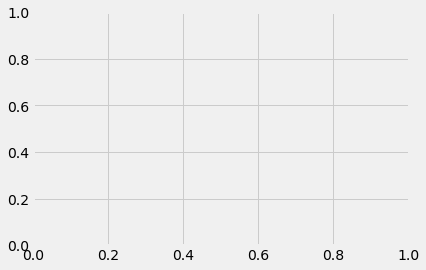

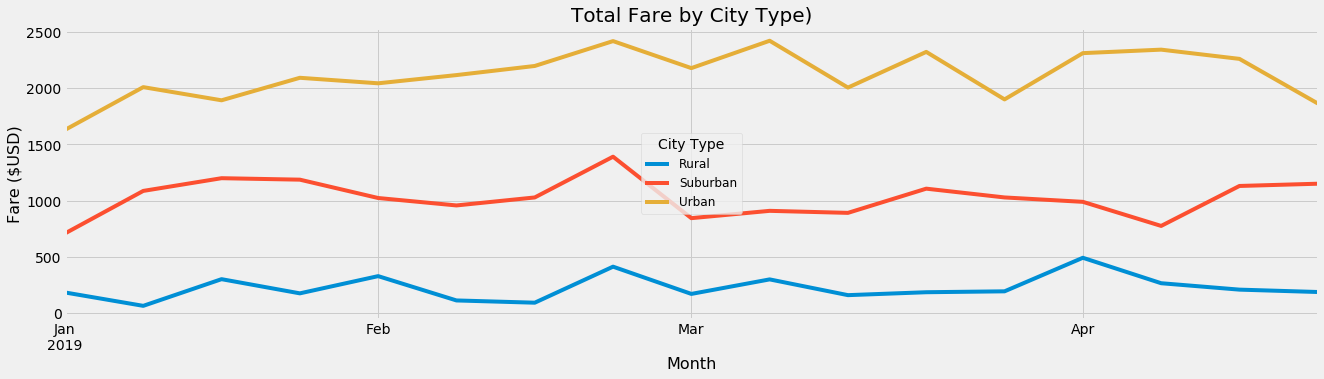

In [78]:
# Add a multi-line chart for the weekly fares of each city.
plt.style.use('fivethirtyeight')

ax = plt.gca()

weekly_fares_index_df.plot(x='Date', y=['Rural','Suburban', 'Urban'], figsize=(20,5), grid=True)


# Incorporate the other graph properties
plt.title("Total Fare by City Type)", fontsize=20)
plt.ylabel("Fare ($USD)", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="12", loc="best", title="City Type")


plt.savefig("analysis/Fig2.png")
plt.show()